# Midi Generator

---

# Setup

## Import

In [1]:
# Import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from epicpath import EPath
# Personal import
from src.MidiGenerator import MidiGenerator
from src import GlobalVariables as g

## Variables

In [2]:
opt_param = dict(
    lr=g.nn.lr,   # 1e-3
    name=g.nn.opt_name, # 'adam'
    decay=g.nn.decay   # 1e-1
)
model_options = dict(
     dropout_d=g.nn.dropout_d,   # dropout for dense layers
     dropout_c=g.nn.dropout_c,   # dropout for convolutional layers
     dropout_r=g.nn.dropout_r,   # dropout for LSTM layers
     all_sequence=g.nn.all_sequence,  # Either to consider the all sequence as the ouput of the LSTM layers
     lstm_state=g.nn.lstm_state,      # Either to consider the state of the LSTM as an output
     sampling=g.nn.sampling,     # Sampling after the Product of Expert
     kld=g.nn.kld,   # Include the KLD loss
     kld_annealing_start=g.nn.kld_annealing_start,   # When to start to increment the KLD loss
     kld_annealing_stop=g.nn.kld_annealing_stop,     # When to stop to increment the KLD loss
     kld_sum=g.nn.kld_sum,    # Some the KLD loss through the time steps
     sah=g.nn.sah,    # Self attention head after the first LSTM layer
     rpoe=g.nn.rpoe   # Give the PoE result as a modality to the next one
 )
loss_options = dict(
    loss_name='mono',   # Name of the loss
    l_scale=g.loss.l_scale,   # Lambda of the scale loss
    l_rhythm=g.loss.l_rhythm,   # Lambda of the rhythm loss
    take_all_step_rhythm=g.loss.take_all_step_rhythm,   # Should consider the all steps all together for the rhythm 
    l_semitone=g.loss.l_semitone,   # Lambda for the semitone loss
    l_tone=g.loss.l_tone,   # Lambda for the tone loss
    l_tritone=g.loss.l_tritone   # Lambda for the tritone loss
)
model_id = 'MRMVAEMono,pc,2'
predict_offset = 1   # Number of step ahead you want to predict

# Create a Model

In [3]:
midi_generator = MidiGenerator(name=None)

new save path for Midi files : generated_midis\None-m()-e(0)-(0)-generation(0)
Got new full_name : None-m()-e(0)-(0)
new save path for Midi files : generated_midis\None-m()-e(0)-(0)-generation(0)


### Create a new model

In [4]:
# Load the data
data_path = EPath('..', 'Dataset', 'Scale')
data_path += '_transformedMono'
midi_generator.load_data(data_transformed_path=data_path)

data at ..\Dataset\Scale_transformedMono loaded


In [5]:
midi_generator.new_nn_model(
    model_id=model_id,
    opt_param=opt_param,
    work_on=g.mg.work_on,   # 'measure'
    model_options=model_options,
    loss_options=loss_options,
    predict_offset=predict_offset,
    print_model=False
)
print('done')

Got new full_name : None-m(MRMVAEMono,pc,2)-e(0)-(0)
new save path for Midi files : generated_midis\None-m(MRMVAEMono,pc,2)-e(0)-(0)-generation(0)
Got new full_name : None-m(MRMVAEMono,pc,2)-e(0)-(0)
new save path for Midi files : generated_midis\None-m(MRMVAEMono,pc,2)-e(0)-(0)-generation(0)
Got new full_name : None-m(MRMVAEMono,pc,2)-e(0)-(0)
new save path for Midi files : generated_midis\None-m(MRMVAEMono,pc,2)-e(0)-(0)-generation(0)
Definition of the graph ...
done


### Load a model

In [ ]:
model_id_load = 'None-MRMVAEMono,pc,2-2-0'
midi_generator.recreate_model(
    id=model_id_load,
    with_weights=True,
    print_model=False
)

# Train

In [6]:
midi_generator.train(
    epochs=2,
    batch=2,
    noise=g.train.noise,   # Insert some noise in the input
    validation=g.train.validation,   # Validation split (0.1)
    sequence_to_numpy=False,    # Store all data in a numpy array and use normal train (/!\ memory leak and OOM /!\)
    fast_sequence=False,    # To train faster in a sequence with very few computation
    memory_sequence=False    # Store all the data in memory in a sequence to train faster. Use .train_seq()
)

Training...
Epoch 1/2
40/40 [==============================] - 15s 377ms/step - loss: 24.1623 - Output_0_loss: 11.8552 - Output_1_loss: 10.6164 - All_outputs_loss: -0.0454 - Output_0_acc: 0.8125 - Output_1_acc: 0.8461 - kld: 0.0000e+00 - harmony: 1.7361 - val_loss: 19.2662 - val_Output_0_loss: 9.0299 - val_Output_1_loss: 7.9917 - val_All_outputs_loss: -0.0092 - val_Output_0_acc: 0.9438 - val_Output_1_acc: 0.9438 - val_kld: 0.0000e+00 - val_harmony: 2.2539
Epoch 2/2
40/40 [==============================] - 14s 351ms/step - loss: 11.8366 - Output_0_loss: 4.9192 - Output_1_loss: 4.4682 - All_outputs_loss: -0.1066 - Output_0_acc: 0.9062 - Output_1_acc: 0.9156 - kld: 1.5354 - harmony: 1.0206 - val_loss: 16.4001 - val_Output_0_loss: 7.4114 - val_Output_1_loss: 6.1175 - val_All_outputs_loss: -0.0157 - val_Output_0_acc: 0.9500 - val_Output_1_acc: 0.9500 - val_kld: 0.8321 - val_harmony: 2.0547
Got new full_name : None-m(MRMVAEMono,pc,2)-e(0)-(0)
new save path for Midi files : generated_midis\No

{'loss': [24.162320280075072, 11.836608803272247],
 'Output_0_loss': [11.855239, 4.9191628],
 'Output_1_loss': [10.61637, 4.468176],
 'All_outputs_loss': [-0.045439668, -0.1066473],
 'Output_0_acc': [0.8125, 0.90625],
 'Output_1_acc': [0.8460938, 0.915625],
 'kld': [0.0, 1.5353644],
 'harmony': [1.7361492, 1.020553],
 'val_loss': [19.266229963302614, 16.400079822540285],
 'val_Output_0_loss': [9.0299425, 7.4114485],
 'val_Output_1_loss': [7.9916673, 6.1174793],
 'val_All_outputs_loss': [-0.009247297, -0.015723895],
 'val_Output_0_acc': [0.94375, 0.95],
 'val_Output_1_acc': [0.94375, 0.95],
 'val_kld': [0.0, 0.83213633],
 'val_harmony': [2.2538679, 2.0547404]}

## Evaluate

In [8]:
midi_generator.evaluate()

Evaluation
45/45 [==============================] - 6s 132ms/step - loss: 31.2248 - Output_0_loss: 12.8645 - Output_1_loss: 15.2836 - All_outputs_loss: -0.0209 - Output_0_acc: 0.9167 - Output_1_acc: 0.9167 - kld: 0.8729 - harmony: 2.2247
loss 31.224807596206666 -- Output_0_loss 12.864498 -- Output_1_loss 15.2836075 -- All_outputs_loss -0.02092815 -- Output_0_acc 0.9166667 -- Output_1_acc 0.9166667 -- kld 0.8729199 -- harmony 2.2247117 -- 


# Save

Model saved in saved_models\None-m(MRMVAEMono,pc,2)-e(2)-(0)


EpicPath('saved_models/None-m(MRMVAEMono,pc,2)-e(2)-(0)')

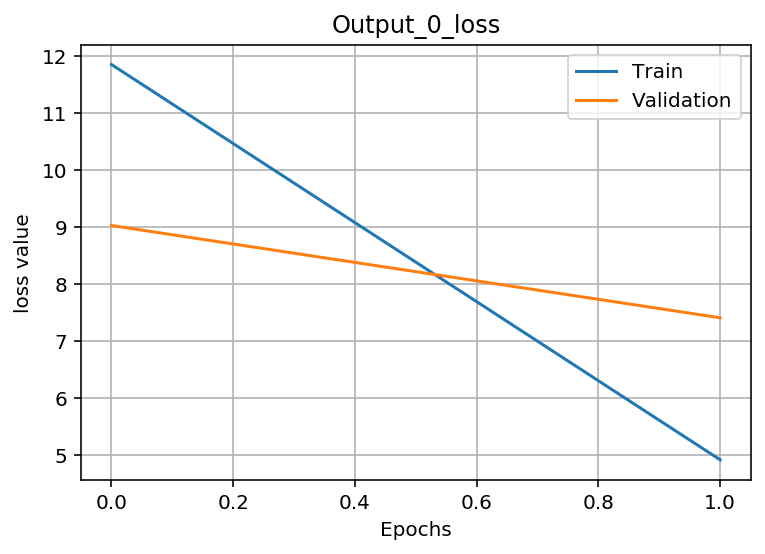

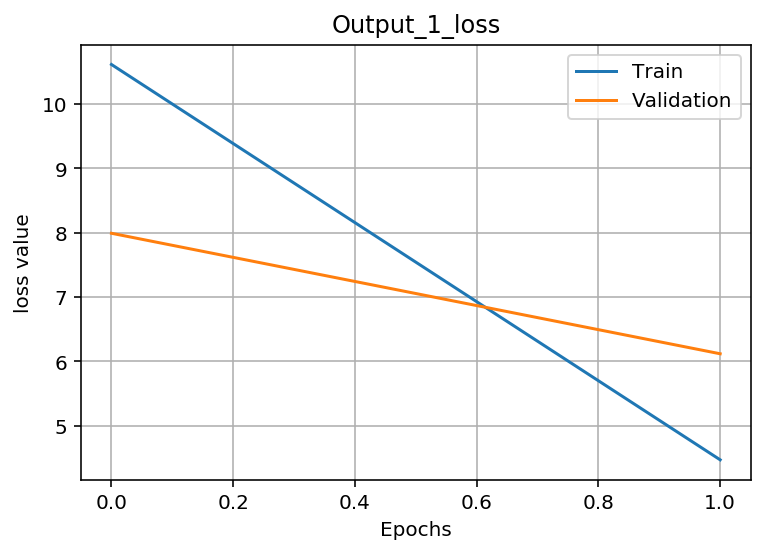

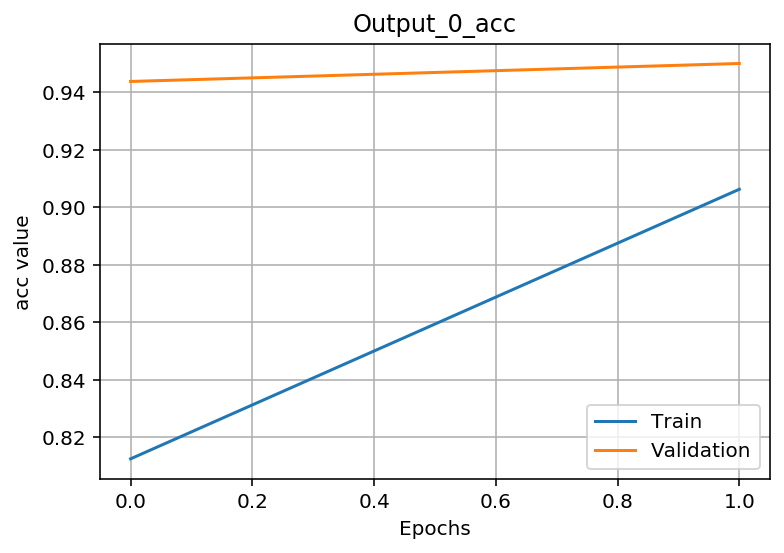

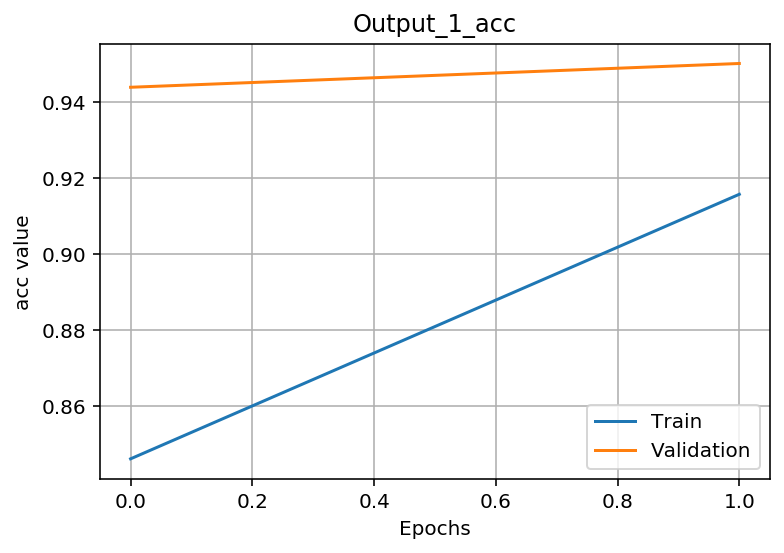

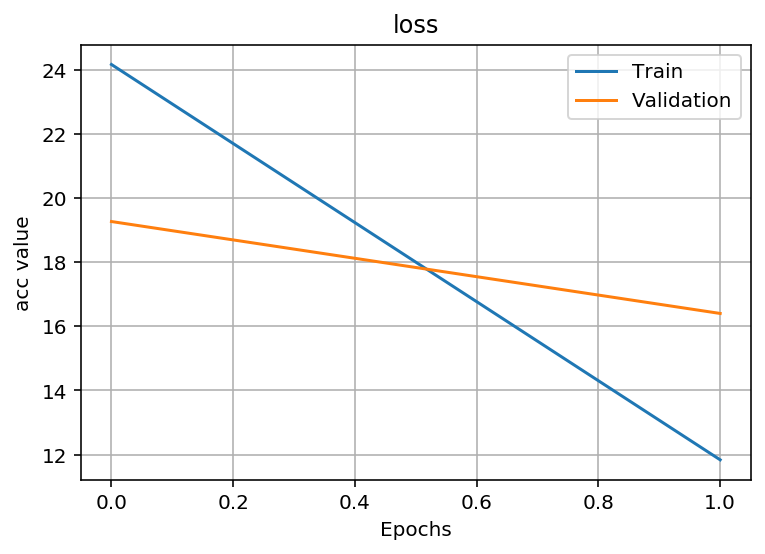

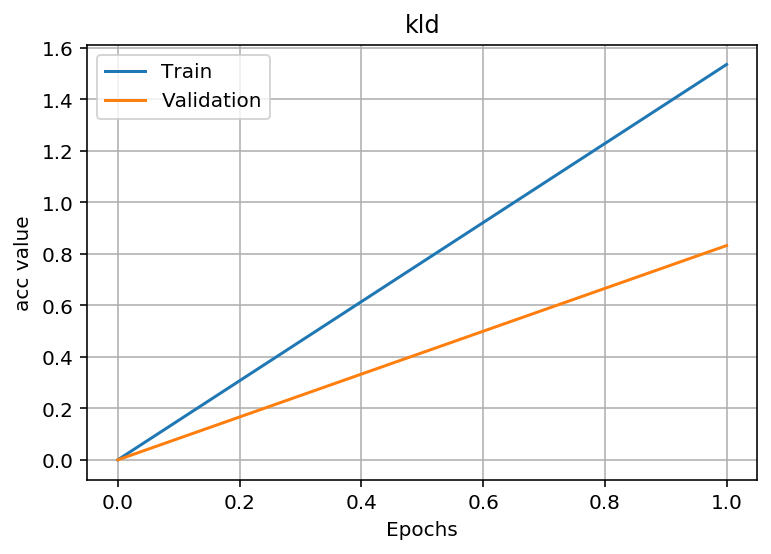

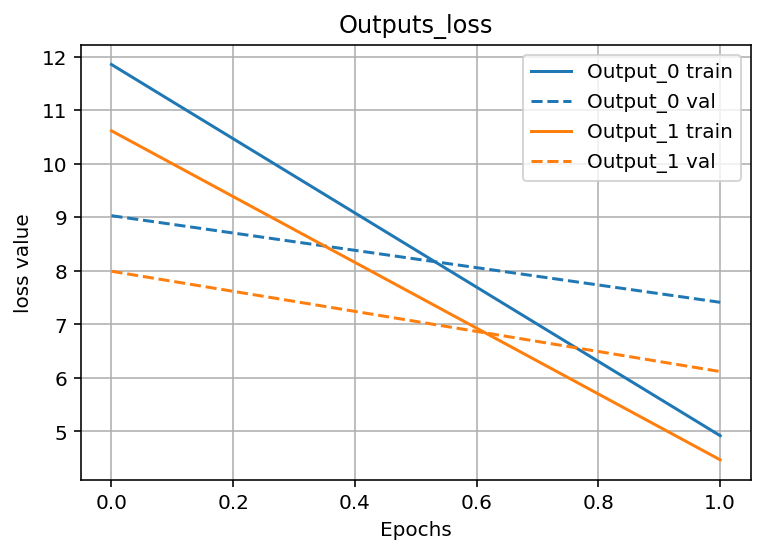

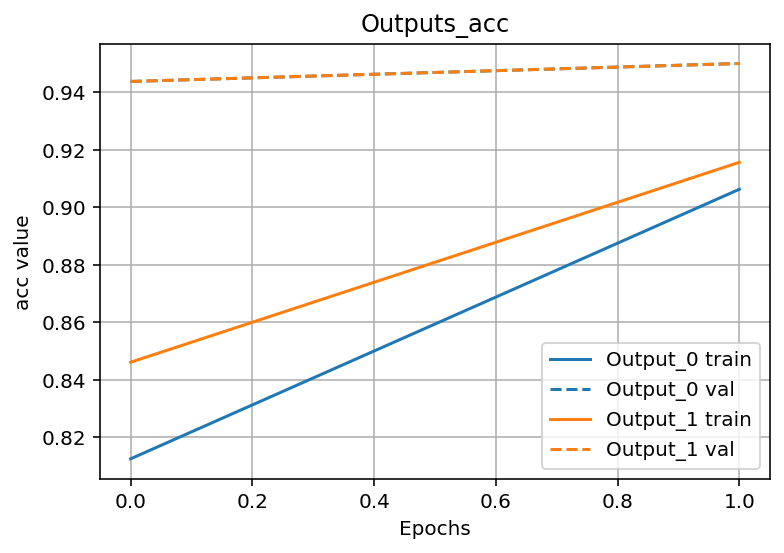

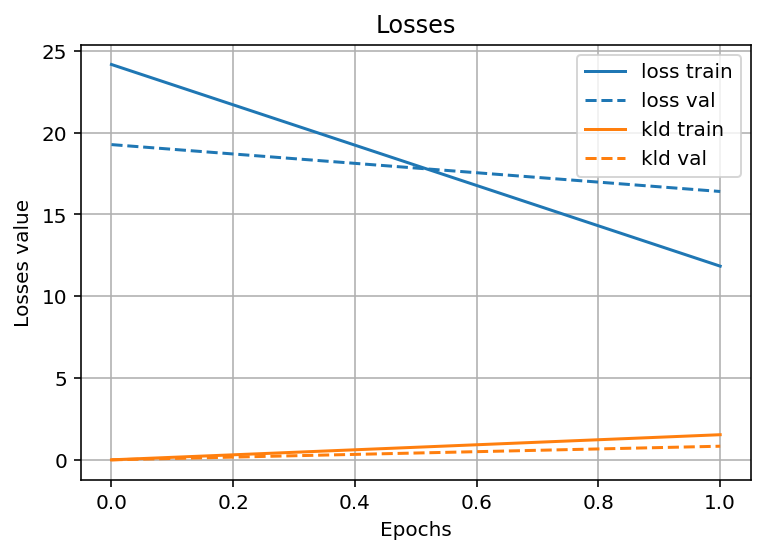

In [7]:
midi_generator.save_model()

# Generation

## generate

In [9]:
midi_generator.generate_from_data(
    nb_seeds=4,
    save_images=True,
    no_duration=True,
)

[                                                         ] N/A% ETA:  --:--:--

Start generating from data ...
Generation 1/4


[=========================================================] 100% Time:  0:00:02
[                                                         ] N/A% ETA:  --:--:--

notes in seed : [16, 16] notes generated : [0, 0] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_0.mid saved
Generation 2/4


[=========================================================] 100% Time:  0:00:00
[=====                                                    ]  10% ETA:   0:00:00

notes in seed : [16, 16] notes generated : [0, 0] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_1.mid saved
Generation 3/4


[=========================================================] 100% Time:  0:00:00
[=====                                                    ]  10% ETA:   0:00:00

notes in seed : [16, 16] notes generated : [0, 0] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_2.mid saved
Generation 4/4


[=========================================================] 100% Time:  0:00:00


notes in seed : [16, 16] notes generated : [0, 0] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_3.mid saved
Done generating


In [10]:
midi_generator.generate_fill(
    no_duration=True,
    verbose=1
)

[======                                                   ]  11% ETA:   0:00:01

Start generating (fill) ...


[=========================================================] 100% Time:  0:00:01


notes in seed : [17, 17] notes generated : [143, 143] for length 320
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_fill_truth.mid saved
notes in seed : [33, 17] notes generated : [143, 143] for length 320
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_fill_0.mid saved
Accuracy of the generation generated_fill_0 : [0.68125, 1.0] , overall : 0.840625
notes in seed : [17, 33] notes generated : [143, 143] for length 320
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\generated_fill_1.mid saved
Accuracy of the generation generated_fill_1 : [1.0, 0.675] , overall : 0.8375
Done generating (fill)


In [13]:
midi_generator.redo_song_generate(
    song_number=None,
    instrument_order=None,
    save_images=True,
    no_duration=True,
    noise=g.train.noise
)

[                                                         ]   1% ETA:   0:00:08

Start redoing song (generate) ...


[=========================================================] 100% Time:  0:00:04


notes in seed : [17, 17] notes generated : [240, 239] for length 512
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\redo_song_generate_truth.mid saved
notes in seed : [17, 17] notes generated : [247, 239] for length 512
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\redo_song_generate_0_(inst_0).mid saved
Accuracy of the generation redo_song_generate_0_(inst_0) : [0.7265625, 1.0] , overall : 0.86328125
notes in seed : [17, 17] notes generated : [231, 231] for length 512
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\redo_song_generate_1_(inst_1).mid saved
Accuracy of the generation redo_song_generate_1_(inst_1) : [0.7265625, 0.732421875] , overall : 0.7294921875
Done redo song generate


In [14]:
midi_generator.compare_generation(
    max_length=None,
    no_duration=True,
    verbose=1
)

[===========                                              ]  20% ETA:   0:00:00

Start comparing generation ...


[=========================================================] 100% Time:  0:00:00


notes in seed : [17, 17] notes generated : [79, 79] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\compare_generation_alone.mid saved
Accuracy of the generation compare_generation_alone : [0.7916666666666666, 0.7916666666666666] , overall : 0.7916666666666666
notes in seed : [17, 17] notes generated : [79, 79] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\compare_generation_helped.mid saved
Accuracy of the generation compare_generation_helped : [0.7916666666666666, 0.7916666666666666] , overall : 0.7916666666666666
notes in seed : [17, 17] notes generated : [79, 79] for length 192
Converting to Midi ...
generated_midis\None-m(MRMVAEMono,pc,2)-e(2)-(0)-generation(0)\compare_generation_truth.mid saved
Done comparing generation


## replicate

In [ ]:
midi_generator.replicate_from_data(
    save_images=True,
    no_duration=True,
    noise=g.train.noise
)

In [ ]:
midi_generator.replicate_fill(
    save_images=True,
    no_duration=True,
    verbose=1,
    noise=g.train.noise
)

In [ ]:
midi_generator.redo_song_replicate(
    song_number=None,
    instrument_order=None,
    save_images=True,
    no_duration=True,
    noise=g.train.noise
)